Predict the prices of stocks of 2018 using LSTM network based on the stock price data between 2011-2017. Data can be downloaded from

https://finance.yahoo.com/quote/goog/history?ltr=1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint

Using TensorFlow backend.


Data Preparation

In [2]:
# Import training set
training_data = pd.read_csv('GOOG_train.csv')
training_set = training_data.iloc[:,1:2].values

In [3]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

In [17]:
# Creating a data structure with 60 timestamps and 1 output
X_train = []
y_train = []
for i in range(60,training_data.shape[0]):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

In [18]:
# Reshaping
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

Initialize RNN

In [8]:
model = Sequential()

# Add first LSTM layer
model.add(LSTM(units=50, return_sequences = True, input_shape = (X_train.shape[1],1)))
model.add(Dropout(0.2))

In [9]:
# Add second LSTM layer
model.add(LSTM(units=50, return_sequences = True))
model.add(Dropout(0.2))

In [10]:
# Add third LSTM layer
model.add(LSTM(units=50, return_sequences = True))
model.add(Dropout(0.2))

In [11]:
# Add fourth LSTM layer
model.add(LSTM(units=50))
model.add(Dropout(0.2))

In [12]:
# Add the output layer
model.add(Dense(units = 1))

In [13]:
# Compile the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [14]:
# Callbacks to save best model and stop training if loss no longer decreases after 10 epochs
early_stop = EarlyStopping(monitor = 'loss', patience = 10)

checkpoint = ModelCheckpoint('StockPrice_model.h5', monitor = 'loss', save_best_only = True)

In [20]:
# Fitting the RNN to the Training Set
model.fit(X_train, y_train, epochs = 100, batch_size = 32, callbacks = [checkpoint, early_stop])

Epoch 1/100
1450/1450 [==============================] - 12s 8ms/step - loss: 0.0020
Epoch 2/100
1450/1450 [==============================] - 13s 9ms/step - loss: 0.0022
Epoch 3/100
1450/1450 [==============================] - 12s 8ms/step - loss: 0.0018
Epoch 4/100
1450/1450 [==============================] - 12s 8ms/step - loss: 0.0016
Epoch 5/100
1450/1450 [==============================] - 12s 8ms/step - loss: 0.0020
Epoch 6/100
1450/1450 [==============================] - 13s 9ms/step - loss: 0.0017
Epoch 7/100
1450/1450 [==============================] - 12s 9ms/step - loss: 0.0017
Epoch 8/100
1450/1450 [==============================] - 13s 9ms/step - loss: 0.0018
Epoch 9/100
1450/1450 [==============================] - 12s 8ms/step - loss: 0.0016
Epoch 10/100
1450/1450 [==============================] - 12s 8ms/step - loss: 0.0015
Epoch 11/100
1450/1450 [==============================] - 12s 8ms/step - loss: 0.0018
Epoch 12/100
1450/1450 [==============================] - 12s 8

Training time: 9 minutes

Making the predictions and visualizing the results

In [21]:
test_data = pd.read_csv('GOOG_test.csv')
real_stock_price = test_data.iloc[:,1:2].values

In [22]:
# Predict the stock price for 2018
all_data = pd.concat((training_data['Open'], test_data['Open']), axis = 0)
inputs = all_data[len(all_data) - len(test_data) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [23]:
X_test = []
for i in range(60,test_data.shape[0]):
    X_test.append(inputs[i-60:i,0])
    
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

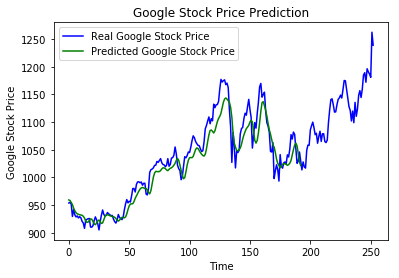

In [24]:
# Visualizing results
plt.plot(real_stock_price, color = 'blue', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

We can see that our prediction goes quite well with the actual stock prices.

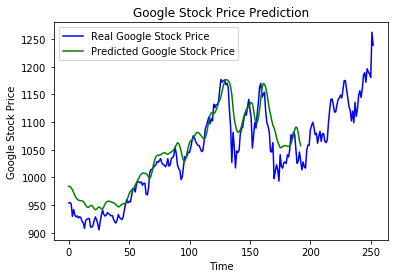

In [25]:
best_model = load_model('StockPrice_model.h5')

predicted_stock_price = best_model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualizing results
plt.plot(real_stock_price, color = 'blue', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

With the best model with very less loss, the prediction goes bit high as compared to the actual prices.